# Importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
dataset = pd.read_csv ('iris.csv')

In [3]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
dataset.shape

(150, 5)

### CHECKING FOR NULL VALUES

In [8]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
uni = dataset.species.unique()
uni

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
s1 = len(dataset[dataset['species'] == 'versicolor'])
print("No of Versicolor in Dataset:",s1)

No of Versicolor in Dataset: 50


In [11]:
s2 = len(dataset[dataset['species'] == 'virginica'])
print("No of Versicolor in Dataset:",s2)

No of Versicolor in Dataset: 50


In [12]:
s3 = len(dataset[dataset['species'] == 'setosa'])
print("No of Versicolor in Dataset:",s3)

No of Versicolor in Dataset: 50


# Data Visualization

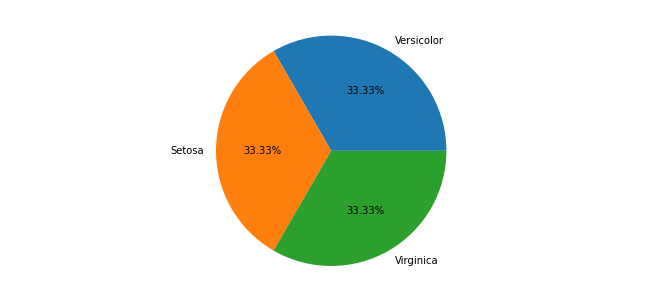

In [13]:
fig = plt.figure(figsize=(9,4))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

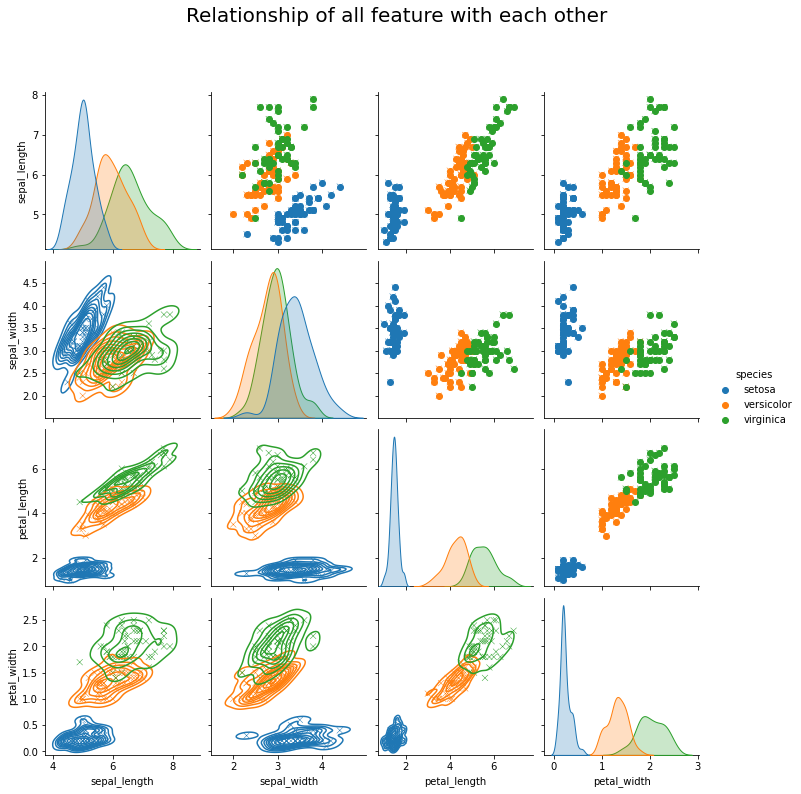

In [14]:
g = sns.pairplot(dataset, hue='species', markers='x')
g.fig.suptitle("Relationship of all feature with each other",y=1.1,fontsize=20)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

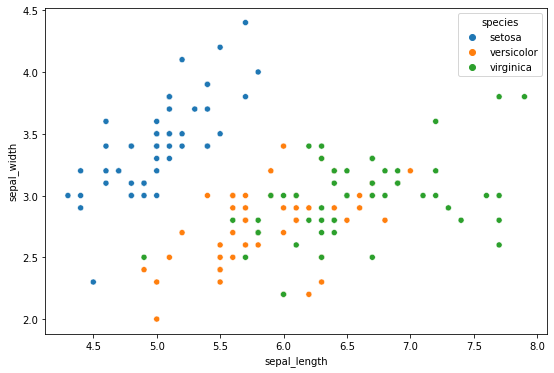

In [15]:
# Plotting scatter plot to demonstrate relationship between speal length and sepal width
plt.subplots(figsize=(9,6))
sns.scatterplot(x="sepal_length",y="sepal_width",data=dataset,hue="species")
plt.show()

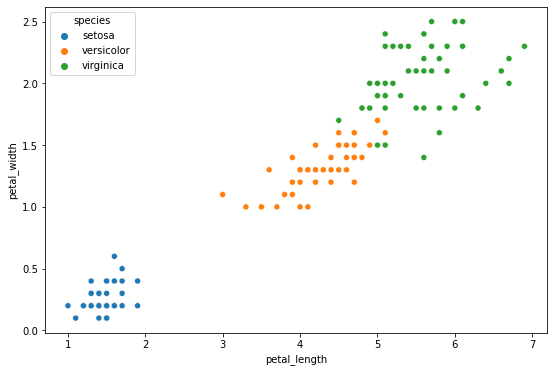

In [16]:
# Plotting scatter plot to demonstrate relationship between petal length and petal width
plt.subplots(figsize=(9,6))
sns.scatterplot(x="petal_length",y="petal_width",data=dataset,hue="species")
plt.show()

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

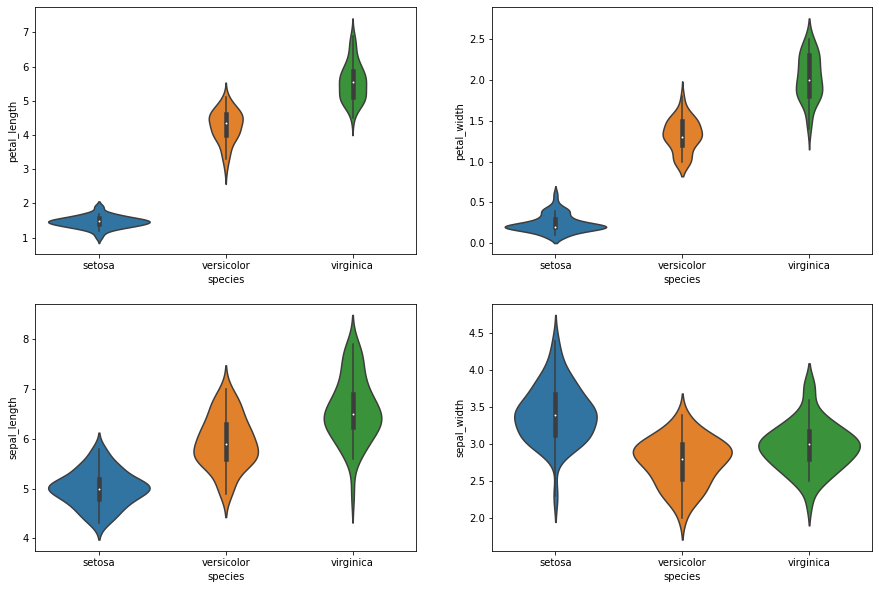

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=dataset)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=dataset)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=dataset)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=dataset)

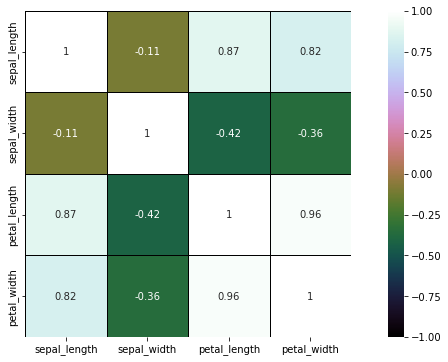

In [18]:
fig=plt.gcf()
fig.set_size_inches(13,6)
fig=sns.heatmap(dataset.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

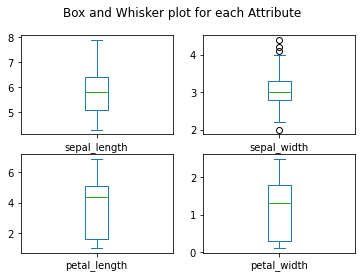

In [19]:
#Checking for outliars
dataset.plot(kind = 'box', subplots = True, layout = (2, 2), 
               sharex = False, sharey = False, title = "Box and Whisker plot for each Attribute")
plt.show()

# Data Modeling

In [20]:
# importing Knn
from sklearn.neighbors import KNeighborsClassifier

# creating an instance of Knn
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['species'] = le.fit_transform(dataset['species'])
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
data = dataset.values
# X is the independent variables and y dependent variable
X = data[:,0:4]  
Y = data[:,4]

In [23]:
from sklearn.model_selection import train_test_split
# create training and testing variable
# the values are splitted into train and test randomly
# not like first 70% for training and last 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30) # test_size=0.30 means 30% data to be used for testing

In [24]:
# fit the knn model on our training data
knn.fit(X_train, y_train)
# predict the response for test dataset
predictions = knn.predict(X_test)

In [25]:
# calculate the accuracy of the model
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy = {}".format(accuracy))
print("Accuracy(%) = {:.4f}".format(accuracy*100)) # rounded off to 4 decimal places

Accuracy = 0.9333333333333333
Accuracy(%) = 93.3333


In [26]:
# we know that first 50 observations are setosa(index=0), next 50 are versicolor(index=1) and last 50 are virginica(index=2)
# so let's try some predictions
pred = knn.predict([X[105]])
print(pred)

[2.]


In [30]:
# inititally we use n_neighbours = 1 i.e k = 1
# we don't know which K value can bring the best accuracy so we'll try different k_values to see which one gives the best accuracy
# we'll use a for loop to try different k_values
# we'll use a dictionary, where k is the key and accuracy is the value

results = {}

for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    results[k] = round(accuracy*100, 4) # get accuracy in percentage, round off to 4 decimal places

sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
for k, acc in sorted_results.items():
    print("Accuracy = {}% for K = {},".format(acc, k))

Accuracy = 95.5556% for K = 2,
Accuracy = 93.3333% for K = 1,
Accuracy = 93.3333% for K = 7,
Accuracy = 93.3333% for K = 22,
Accuracy = 93.3333% for K = 23,
Accuracy = 93.3333% for K = 25,
Accuracy = 91.1111% for K = 3,
Accuracy = 91.1111% for K = 4,
Accuracy = 91.1111% for K = 5,
Accuracy = 91.1111% for K = 6,
Accuracy = 91.1111% for K = 8,
Accuracy = 91.1111% for K = 9,
Accuracy = 91.1111% for K = 11,
Accuracy = 91.1111% for K = 15,
Accuracy = 91.1111% for K = 17,
Accuracy = 91.1111% for K = 19,
Accuracy = 91.1111% for K = 20,
Accuracy = 91.1111% for K = 21,
Accuracy = 88.8889% for K = 10,
Accuracy = 88.8889% for K = 12,
Accuracy = 88.8889% for K = 13,
Accuracy = 88.8889% for K = 14,
Accuracy = 88.8889% for K = 16,
Accuracy = 88.8889% for K = 18,
Accuracy = 88.8889% for K = 24,


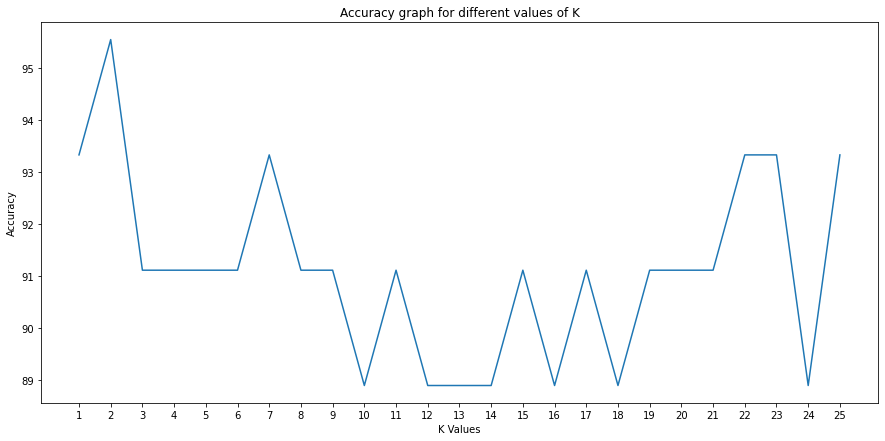

In [31]:
plt.figure(figsize=(15,7))
plt.plot(list(results.keys()), list(results.values()))
plt.title("Accuracy graph for different values of K")
plt.xticks(list(results.keys()))
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()

---